In [114]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import namedtuple
Cluster = namedtuple('Point', 'x y z')#meant to convey x,y,z mean of cluster
df = pd.read_csv('/Users/sarahflanigen/research/ObstacleSegmentation/euclideandistancebetweeneverycombination_andclosestptdist.csv')
npdf = df[['x','y','z']].to_numpy()

In [115]:
clustering = DBSCAN(eps=.5, min_samples=2).fit(npdf)


(array([7214., 2102.,  654.,  590.,  190.,  143.,  214.,  162.,  304.,
         202.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

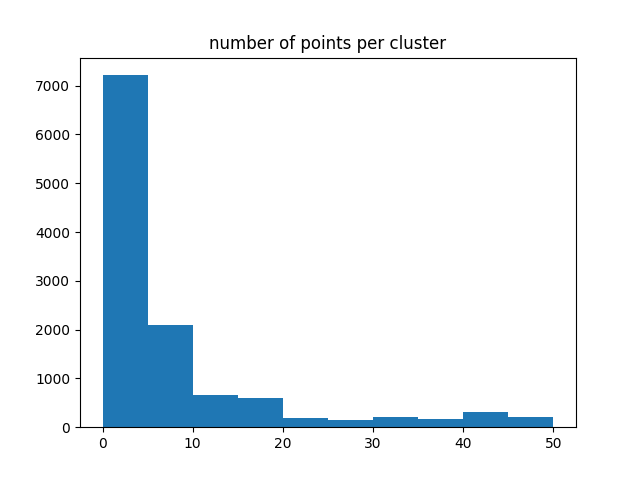

In [116]:
%matplotlib widget
plt.title('number of points per cluster')
plt.hist(clustering.labels_)



In [117]:
df['clusterfromdbscan'] = clustering.labels_
dfsample = df[df.clusterfromdbscan < 10]

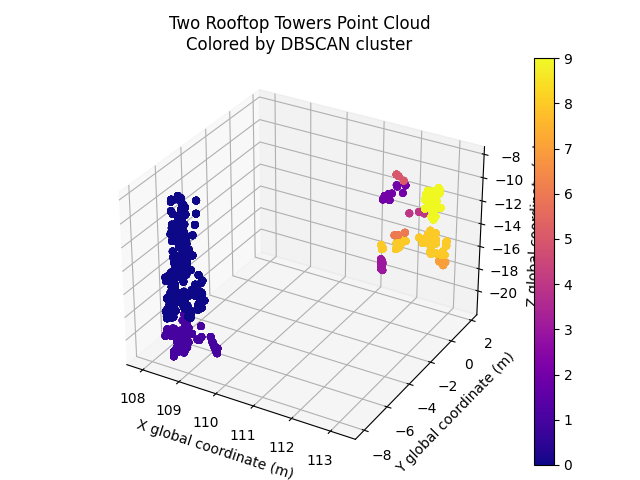

In [118]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(dfsample.x,dfsample.y,dfsample.z,c = dfsample.clusterfromdbscan,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by DBSCAN cluster")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)


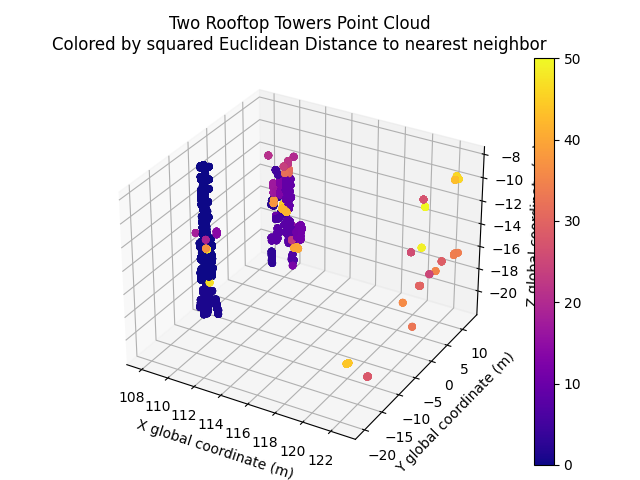

In [119]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(df.x,df.y,df.z,c = clustering.labels_,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by squared Euclidean Distance to nearest neighbor")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [120]:
df.head()

,Unnamed: 0,x,y,z,dist,r,g,b,ang,time,clusternum,dist2closest,clusterfromdbscan
0,0,108.217361,-7.129901,-15.199099,255,255,0,99.863556,0.042817,1.632344e+12,0,0.003509,0
1,1,108.219841,-7.035352,-15.197919,255,255,0,99.856895,0.042817,1.632344e+12,0,0.002139,0
2,2,108.655457,-7.186751,-11.738757,255,255,0,99.952934,0.042817,1.632344e+12,1,0.011684,0
3,3,108.613075,-7.087424,-11.734018,255,255,0,99.901031,0.042817,1.632344e+12,1,0.007860,0
4,4,108.217361,-7.129901,-15.199099,255,255,0,99.863556,0.042722,1.632344e+12,0,0.003509,0


In [121]:
exampleclusterdf = df[df['clusterfromdbscan']==0]
exampleclusterdf.describe()


,Unnamed: 0,x,y,z,dist,r,g,b,ang,time,clusternum,dist2closest,clusterfromdbscan
count,4758.000000,4758.000000,4758.000000,4758.000000,4758.0,4758.0,4758.0,4758.000000,4758.000000,4.758000e+03,4758.000000,4758.000000,4758.0
mean,5378.185162,108.578416,-7.113757,-14.278710,255.0,255.0,0.0,90.858189,0.029039,1.632344e+12,0.903531,0.033324,0.0
std,3544.991810,0.222000,0.326347,3.020026,0.0,0.0,0.0,5.341044,0.002805,0.000000e+00,3.820514,0.029411,0.0
min,0.000000,108.092796,-8.036338,-18.262072,255.0,255.0,0.0,82.363411,0.027218,1.632344e+12,0.000000,0.002139,0.0
25%,1759.250000,108.438942,-7.341134,-17.053295,255.0,255.0,0.0,86.985023,0.027436,1.632344e+12,0.000000,0.011593,0.0
50%,5506.500000,108.610840,-7.085114,-15.174309,255.0,255.0,0.0,90.160667,0.027916,1.632344e+12,0.000000,0.024445,0.0
75%,8440.000000,108.686752,-6.871312,-11.643709,255.0,255.0,0.0,96.284523,0.029483,1.632344e+12,1.000000,0.044726,0.0
max,11771.000000,109.113014,-6.373037,-8.300071,255.0,255.0,0.0,99.952934,0.042817,1.632344e+12,35.000000,0.174660,0.0


In [142]:
def XYZmean(df):
    print(type(df))
    xmean=np.mean(df['x'])
    ymean=np.mean(df.y)
    zmean=np.mean(df.z)
    return Cluster(xmean, ymean, zmean) #assigning to tuple "cluster"

cluster_centers=dict.fromkeys(df.clusterfromdbscan.unique())
for cluster in df.clusterfromdbscan.unique():  
    tempclusterseries = df[df['clusterfromdbscan']==cluster][['x', 'y', 'z']].agg('mean') #grabs all points associated with cluster in for loop step
    
    cluster_centers[cluster]= Cluster(tempclusterseries.x,tempclusterseries.y,tempclusterseries.z) #makes cluster series type into dict, 'cluster_centers.x,...'
#print(type(cluster_centers))
#cluster_centers


<class 'dict'>


{0: Point(x=108.57841601699664, y=-7.1137570480496, z=-14.278709910151322),
 1: Point(x=108.63190793477473, y=-7.044789063126374, z=-20.351331138769233),
 2: Point(x=111.54392095481927, y=1.576214584618474, z=-12.350185614417672),
 3: Point(x=111.76583765147652, y=-0.1253800932214765, z=-17.04782072439597),
 4: Point(x=112.26892175449436, y=1.5236675676404496, z=-13.316969356853932),
 5: Point(x=112.02188423243592, y=0.4552257205128203, z=-9.643865206282053),
 6: Point(x=112.37343851999998, y=-0.710802, z=-13.294067063333332),
 7: Point(x=112.85915950449105, y=1.7263380008383227, z=-17.311168761437123),
 8: Point(x=112.74126776002716, y=0.3118050305248869, z=-14.613580706515837),
 9: Point(x=112.8890034318907, y=0.45768255477104874, z=-11.066145117917282),
 10: Point(x=112.02196152189185, y=0.18697256756756753, z=-13.4598193272973),
 11: Point(x=113.77190597106626, y=0.2207895880979827, z=-14.309368635129683),
 12: Point(x=113.42443847999998, y=-0.37634200000000007, z=-17.1777668),
 13

4.092076301621573


(array([ 4.,  0.,  8.,  0.,  0., 28.,  0.,  9.,  0.,  2.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <BarContainer object of 10 artists>)

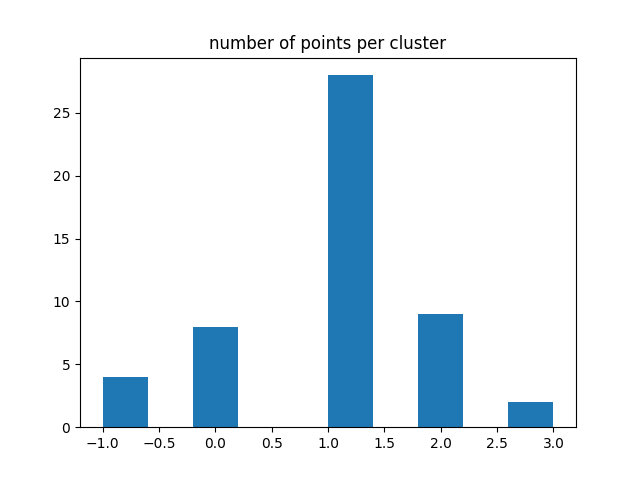

In [156]:
#Associate clusters by neighborhood
# np.array(cluster_centers.items())
cluster_center_array=pd.DataFrame.from_dict(cluster_centers,orient='index').to_numpy()
LIDAR_range=100
elevation_angle=(30*np.pi)/180
number_beams=16
raster_buffer=1.25 #25%
distance_between_raster_lines=LIDAR_range*np.tan(elevation_angle / number_beams)*raster_buffer
print(distance_between_raster_lines)
neighborhood_clustering = DBSCAN(eps=distance_between_raster_lines, min_samples=2).fit(cluster_center_array)
neighborhood_clustering_variable = neighborhood_clustering.labels_

%matplotlib widget
plt.title('number of points per cluster')
plt.hist(neighborhood_clustering.labels_)


In [176]:
# for point,newcluster in neighborhood_clustering.labels_
newclusters = pd.DataFrame(neighborhood_clustering.labels_)
newclusters.columns = ['newcluster']
clustercenterdf = pd.DataFrame(cluster_center_array)

clustercenterdf = clustercenterdf.join(newclusters)

clustercenterdf.columns=['x','y','z','newcluster']
print(clustercenterdf)

old2newclustermap = clustercenterdf.newcluster.to_dict()

df['newcluster'] = df['clusterfromdbscan'].map(old2newclustermap)


             x          y          z  newcluster
0   108.578416  -7.113757 -14.278710           0
1   108.631908  -7.044789 -20.351331           0
2   111.543921   1.576215 -12.350186           1
3   111.765838  -0.125380 -17.047821           1
4   112.268922   1.523668 -13.316969           1
5   112.021884   0.455226  -9.643865           1
6   112.373439  -0.710802 -13.294067           1
7   112.859160   1.726338 -17.311169           1
8   112.741268   0.311805 -14.613581           1
9   112.889003   0.457683 -11.066145           1
10  112.021962   0.186973 -13.459819           1
11  113.771906   0.220790 -14.309369           1
12  113.424438  -0.376342 -17.177767           1
13  112.111559   1.282647 -10.875524           1
14  109.540882  -7.295738 -13.788095           0
15  112.922889   1.360986 -14.563934           1
16  112.055019   2.367785 -11.263121           1
17  111.662626   0.837331 -11.219257           1
18  107.919403  -7.293567 -14.315037           0
19  108.888680  -7.9

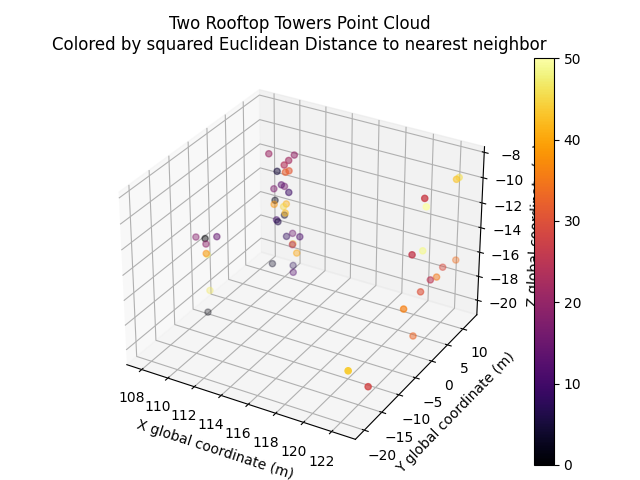

In [179]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
#p = ax3D.scatter(df.x,df.y,df.z)#original points colored by neighborhood, removed "",c = df.newcluster,cmap = plt.get_cmap("plasma")""
p = ax3D.scatter(clustercenterdf.x,clustercenterdf.y,clustercenterdf.z,c = clustercenterdf.index,cmap = plt.get_cmap("inferno"))#just centers that were basis for neighbor
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by squared Euclidean Distance to nearest neighbor")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [ ]:
exampleclusterdf2 = df[df['clusterfromdbscan']==1]
exampleclusterdf2.describe()

,Unnamed: 0,x,y,z,dist,r,g,b,ang,time,clusternum,dist2closest,clusterfromdbscan
count,1820.00000,1820.000000,1820.000000,1820.000000,1820.0,1820.0,1820.0,1820.000000,1820.000000,1.820000e+03,1820.0,1820.000000,1820.0
mean,5473.19011,108.631908,-7.044789,-20.351331,255.0,255.0,0.0,91.453366,0.029055,1.632344e+12,2.0,0.027708,1.0
std,3437.82554,0.368951,0.364164,0.635199,0.0,0.0,0.0,5.186463,0.002986,0.000000e+00,0.0,0.034099,0.0
min,88.00000,107.943855,-7.883858,-21.233086,255.0,255.0,0.0,82.798332,0.027218,1.632344e+12,2.0,0.005363,1.0
25%,2477.25000,108.398582,-7.257257,-20.785402,255.0,255.0,0.0,87.921341,0.027375,1.632344e+12,2.0,0.010962,1.0
50%,5730.50000,108.638649,-7.019534,-20.514957,255.0,255.0,0.0,90.422684,0.027579,1.632344e+12,2.0,0.016111,1.0
75%,8155.50000,108.701241,-6.740389,-19.964569,255.0,255.0,0.0,96.153435,0.028317,1.632344e+12,2.0,0.024625,1.0
max,11749.00000,109.362595,-6.390067,-19.070679,255.0,255.0,0.0,99.905128,0.037396,1.632344e+12,2.0,0.177466,1.0


In [ ]:
def cluster_size_filter(clusters, min_number_points)
    for cluster in clusters
        if cluster_points > min_number_points
            

SyntaxError: invalid syntax (<ipython-input-92-14b866c1025b>, line 1)

In [ ]:
def calculate_center(thiscluster):
    x_center = thiscluster.x.mean()
    y_center = thiscluster.y.mean()
    x_std = thiscluster.x.std()
    y_std = thiscluster.y.std()
    rad = 2*max(x_std,y_std)
    return x_center,y_center,rad

In [ ]:
circ1 = calculate_center(exampleclusterdf)
circ2 = calculate_center(exampleclusterdf2)
print(f"cluster1 {circ1}\ncluster2 {circ2}")

cluster1 (108.57841601699664, -7.1137570480496, 0.652694616620612)
cluster2 (108.63190793477473, -7.044789063126374, 0.7379012428637184)


In [ ]:
def intersection_area(x0, y0, R, x1, y1, r):
    """Return the area of intersection of two circles.

    The circles have radii R and r and centers (x1,y1) and (x2,y2).

    """
    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    return ( r2 * alpha + R2 * beta -
             0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta))
           ) / (np.pi * min(R,r)**2) #area of intersection normalized by area of smallest circle, % containment
intersection_area(circ1[0],circ1[1],circ1[2],circ2[0],circ2[1],circ2[2])

0.9996869643470574

In [ ]:
#TODO iterate through all clusters and group if over some threshold 
#the threshold quantity of intersecting clusters threshold is dependent on upstream cluster nearness value (eps in DBSCAN) 